# Settings, Directory Specs, and Imports

In [1]:
# 0 = no streamlit
# 1 = test user inputs
# 2 = run in streamlit
streamlit_status = 0
#file_name_pickle_read = 'model_2020_06_06_1105.pickle'
do_plots = 1

dir_read = '/Users/rachellehorwitz/Documents/ViTalErt/data/filtered05/'
#dir_read = '/Users/rachellehorwitz/Documents/VTAlert/over18_eicu/'

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, confusion_matrix, plot_confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import streamlit as st
import pickle
from datetime import datetime
import pyprojroot


matplotlib.rcParams.update({'font.size': 22})

# Function Definitions

In [2]:
def now_to_str():
    now = str(datetime.now())
    return now[0:4] + '_' + now[5:7] + '_' + now[8:10] + '_' + now[11:13] + now[14:16]

In [15]:
Xy = pd.read_csv('/Users/rachellehorwitz/Documents/ViTalErt/notebooks/Xy_2020_06_09_0915.csv')
y = Xy.pop('label')
X = Xy.copy()
X.columns

Index(['patientunitstayid', 'patienthealthsystemstayid', 'age',
       'admissionweight', 'admissionheight', 'bmi', 'gender_Female',
       'ethnicity_African American', 'ethnicity_Asian', 'ethnicity_Caucasian',
       'ethnicity_Hispanic', 'ethnicity_Native American',
       'ethnicity_Other/Unknown', 'unitstaytype_admit', 'unitstaytype_readmit',
       'unitstaytype_stepdown/other', 'unitstaytype_transfer', 'verbal',
       'motor', 'eyes', 'thrombolytics', 'aids', 'hepaticfailure', 'lymphoma',
       'metastaticcancer', 'leukemia', 'immunosuppression', 'cirrhosis',
       'activetx', 'ima', 'midur', 'ventday1', 'oobventday1', 'oobintubday1',
       'diabetes', 'creatinine', 'visitnumber'],
      dtype='object')

# eICU Data Wrangling

In [3]:
# # Read files from csv
# patient = pd.read_csv(dir_read + 'patient.csv')
# admissiondx = pd.read_csv(dir_read + 'admissiondx.csv')
# diagnosis = pd.read_csv(dir_read + 'diagnosis.csv')
# ptusid_pos = pd.read_csv(dir_read + 'pos_ptunitstayid.csv')

# # Create dataframe of patientunitstayids in negative class
# tmp = patient[~patient['patientunitstayid'].isin(ptusid_pos['patientunitstayid'])]
# ptusid_neg = tmp[['patientunitstayid']]

# # Create labels
# ptusid_neg = ptusid_neg.assign(label=0)
# ptusid_pos = ptusid_pos.assign(label=1)

# # Add labels to "patient" dataframe and move 'label' column to left
# ptusid_w_label = pd.concat([ptusid_pos, ptusid_neg])
# ptusid_w_label.shape[0]
# ptusid_w_label = ptusid_w_label.set_index('patientunitstayid')
# patient = patient.set_index('patientunitstayid')
# patient = patient.join(ptusid_w_label)

# # Move 'label' column to left
# cols = list(patient.columns)
# cols = [cols[-1]] + cols[:-1]
# patient = patient[cols]

# # Remove patients who weigh less than 40 kg or more than 400 kg
# patient = patient[(patient['admissionweight'] > 40) & \
#                    (patient['admissionweight'] < 400)]

# # Remove patients who are shorter than 100 cm (3.2 ft) or taller than 230 cm (~7.5 ft)
# patient = patient[(patient['admissionheight'] > 100 ) & (patient['admissionheight'] < 230)]
# # Drop unneeded columns of patient
# patient = patient.drop(columns=['hospitalid', 'wardid', 'dischargeweight', 'unitdischargetime24', \
#                                 'unitdischargeoffset', 'unitdischargelocation'])

#  # Add BMI column to patient
# patient = patient.assign(bmi=lambda x: x.admissionweight/((x.admissionheight/100)**2))

In [4]:
# # Dummy variables for gender, ethnicity, unitstaytype
# patient = pd.concat([patient, pd.get_dummies(patient['gender'], prefix='gender')], axis=1)
# patient = pd.concat([patient, pd.get_dummies(patient['ethnicity'], prefix='ethnicity')], axis=1)
# patient = pd.concat([patient, pd.get_dummies(patient['unitstaytype'], prefix='unitstaytype')], axis=1)

In [5]:
# nstds = 5
# print(str(169+nstds*patient['admissionheight'].std()))
# print(str(169-nstds*patient['admissionheight'].std()))

In [6]:
# patient_pos = patient[patient['label']==1]
# patient_neg = patient[patient['label']==0]
# patient[patient['label']==1].shape[0]

# Defining X and y

In [20]:
# # Define X and y
# #tmp1 = patient[['age', 'admissionweight', 'admissionheight']]
# X = pd.concat([patient[['age', 'admissionweight', 'admissionheight']], \
#                patient.filter(like='gender_'), \
#                patient.filter(like='unitstaytype_'), \
#                patient.filter(like='ethnicity_')], axis=1)
# #X = X.assign(bmi=lambda x: x.admissionweight/((x.admissionheight/100)**2))

# y = patient['label']

# # Partition and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
X_train

,patientunitstayid,patienthealthsystemstayid,age,admissionweight,admissionheight,bmi,gender_Female,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,...,cirrhosis,activetx,ima,midur,ventday1,oobventday1,oobintubday1,diabetes,creatinine,visitnumber
132916,3122357,2537750,79,60.30,160.2,23.495911,1,0,0,1,...,0,1,0,0,1,1,1,0,0.40,1
122390,2935005,2380377,56,173.00,168.0,61.295351,1,0,0,1,...,0,1,0,0,0,0,0,0,0.69,1
100927,2483164,1973410,56,77.10,165.1,28.285264,1,0,0,1,...,0,1,0,0,1,1,1,0,0.33,1
29777,801234,611216,33,85.00,179.0,26.528510,1,0,0,1,...,0,1,0,0,1,1,1,0,0.80,1
135421,3146656,2558487,67,86.00,173.9,28.438016,0,0,0,1,...,0,1,0,0,0,0,0,0,1.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9289,265597,228382,47,82.55,177.8,26.112807,0,0,0,1,...,0,0,0,0,0,0,0,0,5.50,1
17048,457269,388563,72,62.50,165.1,22.929040,0,0,0,0,...,0,1,0,0,1,1,1,0,-1.00,1
30452,820917,623061,78,86.80,182.8,25.975705,0,0,0,1,...,0,1,0,0,0,0,0,0,-1.00,1
17846,480885,407607,66,80.00,177.8,25.306173,0,0,0,0,...,0,0,0,0,0,0,0,0,5.40,1


In [21]:
y_train[y_train==1]

109473    1
131869    1
1073      1
143372    1
48477     1
         ..
41235     1
14425     1
40476     1
116868    1
119352    1
Name: label, Length: 364, dtype: int64

# Breakpoint

In [ ]:
if streamlit_status == 1:
    age = 30
    admissionweight = 50
if streamlit_status == 2:
    age = st.slider('Age', 19, 90)
    admissionweight = st.slider('Admission Weight (kg)', 40, 300)
if (streamlit_status == 1) | (streamlit_status == 2): 
    input_data = {'age': [age], 'admissionweight': [admissionweight]}
    X_test = pd.DataFrame(input_data, columns=['age', 'admissionweight'])

# Model and Predict

In [ ]:
# THRESHOLD = 0.01
# y_pred = np.where(log_clf.predict_proba(x_train)[:,1] > THRESHOLD, 1, 0) # log_clf: classifier. 
# # [:,1]: picking out positive probabilities. where that's true, insert value of 1, otherwise 0

0.6832063641879593
F1 score is: 0.012815126050420168
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.718


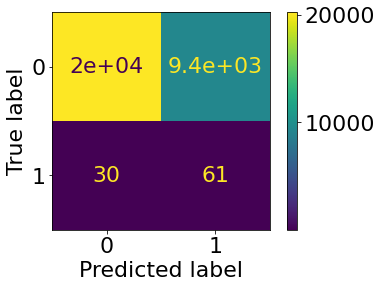

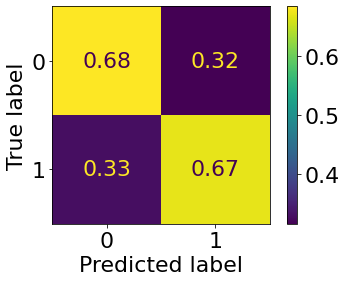

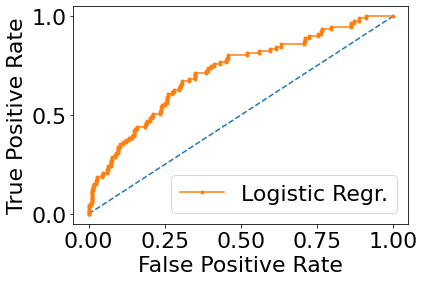

prob_sc:  min = 2.034634375032777e-17
	    max = 0.9659187302416279


In [23]:
# Logistic Regression - basic form

logisticRegr_sc = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))
logisticRegr_sc.fit(X_train, y_train)
file_name_pickle = 'model_' + now_to_str() + '.pickle'
pickle.dump(logisticRegr_sc, open(file_name_pickle, 'wb'))

# if (streamlit_status == 1) | (streamlit_status == 2):
#     logisticRegr_sc = pickle.load(open(file_name_pickle_read, 'rb'))

yhat_logisticRegr_sc = logisticRegr_sc.predict(X_test)
prob_logisticRegr_sc = logisticRegr_sc.predict_proba(X_test)[:,1]
#lprob_sc = logisticRegr_sc.predict_log_proba(X_test)[:,1]

scores_sc = logisticRegr_sc.score(X_test, y_test)
print(scores_sc)
print('F1 score is: ' + str(f1_score(y_test, yhat_logisticRegr_sc)))

# # Print baseline accuracy
# N0_bl = patient[patient['label']==0].shape[0]
# N1_bl = patient[patient['label']==1].shape[0]
# print('{:d} patients in negative class'.format(N0_bl))
# print('{:d} patients in positive class'.format(N1_bl))
# print('If you predict 0 all the time, accuracy is {:.5f}%'.format(N0_bl/(N0_bl+N1_bl)))

cm = confusion_matrix(list(y_test), yhat_logisticRegr_sc)
plot_confusion_matrix(logisticRegr_sc, X_test, list(y_test))
plot_confusion_matrix(logisticRegr_sc, X_test, list(y_test),  normalize='true')

# ROC curve (https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)
noskill_probs = [0 for _ in range(len(y_test))]
noskill_auc = roc_auc_score(y_test, noskill_probs)
logisticRegr_auc = roc_auc_score(y_test, prob_logisticRegr_sc)
print('No Skill: ROC AUC=%.3f' % (noskill_auc))
print('Logistic: ROC AUC=%.3f' % (logisticRegr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, noskill_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, prob_logisticRegr_sc)

plt.figure()
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regr.')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

print('prob_sc:  min = ' + str(np.min(prob_logisticRegr_sc)))
print('\t    max = ' + str(np.max(prob_logisticRegr_sc)))

In [ ]:
# Random Forest Classification - basic form
from sklearn.ensemble import RandomForestClassifier
rfc_vanilla = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rfc_vanilla.fit(X_train, y_train)

In [ ]:
logisticRegr_sc = make_pipeline(StandardScaler(), LogisticRegression())
logisticRegr_sc.fit(X_train, y_train)
file_name_pickle = 'model_' + now_to_str() + '.pickle'
pickle.dump(logisticRegr_sc, open(file_name_pickle, 'wb'))

# if (streamlit_status == 1) | (streamlit_status == 2):
#     logisticRegr_sc = pickle.load(open(file_name_pickle_read, 'rb'))

yhat_logisticRegr_sc = logisticRegr_sc.predict(X_test)
prob_logisticRegr_sc = logisticRegr_sc.predict_proba(X_test)[:,1]
#lprob_sc = logisticRegr_sc.predict_log_proba(X_test)[:,1]

scores_sc = logisticRegr_sc.score(X_test, y_test)
print(scores_sc)
print('F1 score is: ' + str(f1_score(y_test, yhat_logisticRegr_sc)))

# Print baseline accuracy
N0_bl = patient[patient['label']==0].shape[0]
N1_bl = patient[patient['label']==1].shape[0]
print('{:d} patients in negative class'.format(N0_bl))
print('{:d} patients in positive class'.format(N1_bl))
print('If you predict 0 all the time, accuracy is {:.5f}%'.format(N0_bl/(N0_bl+N1_bl)))

cm = confusion_matrix(list(y_test), yhat_logisticRegr_sc)
plot_confusion_matrix(logisticRegr_sc, X_test, list(y_test))
plot_confusion_matrix(logisticRegr_sc, X_test, list(y_test),  normalize='true')

# ROC curve (https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)
noskill_probs = [0 for _ in range(len(y_test))]
noskill_auc = roc_auc_score(y_test, noskill_probs)
logisticRegr_auc = roc_auc_score(y_test, prob_logisticRegr_sc)
print('No Skill: ROC AUC=%.3f' % (noskill_auc))
print('Logistic: ROC AUC=%.3f' % (logisticRegr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, noskill_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, prob_logisticRegr_sc)

plt.figure()
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regr.')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

print('prob_sc:  min = ' + str(np.min(prob_logisticRegr_sc)))
print('\t    max = ' + str(np.max(prob_logisticRegr_sc)))

# Breakpoint